<a href="https://colab.research.google.com/github/sayeeshruthiwindsor/MNIST-CNN/blob/main/experiments_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

data preparation

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step


# Utilities

a simple model generator

also available activation layers:
https://keras.io/api/layers/activation_layers/


In [5]:
def gen(
    input = input_shape,
    output = num_classes,
    conv = (8, 16, 32), # conv layers with feature map numbers
    kernel = 3, # kernel size
    activation = keras.layers.ReLU,
    maxpool = 2, #  maxpool size
    c_p = True, # pool after each conv2d
    dense = (),
    dropout = 0.4
):
  model = keras.Sequential()
  model.add(keras.Input(shape=input))

  # now add conv2d layers
  for layer in conv:
    model.add(layers.Conv2D(layer, kernel_size=kernel, padding='same'))
    model.add(activation())

    # maxpool after each conv2d layer
    if c_p:
      model.add(layers.MaxPool2D(pool_size=maxpool))
  
  if not c_p:
    model.add(layers.MaxPool2D(pool_size=maxpool))
  
  model.add(layers.Flatten())

  # add dense layers
  for layer in dense:
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(layer))
    model.add(activation())

  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(output, activation='softmax'))

  return model

function for plotting results

In [6]:
def plot_results(histories, hyperparameter = []):
    plt.figure(figsize=(10,10))
    # plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for history in histories:
        plt.plot(history.history['val_accuracy'])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(hyperparameter)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for history in histories:
        plt.plot(history.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(hyperparameter)
    plt.show()

function for training models

In [7]:
def train(models, batch_size = 64, epochs = 30):
    histories = [model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, validation_data=(x_test,y_test)) for model in models]
    return histories

# what happened with a single conv2d layers

single conv2d layer

In [ ]:
# how many filters
filters = [8,16,32]

models = [gen(conv=(n,)) for n in filters]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

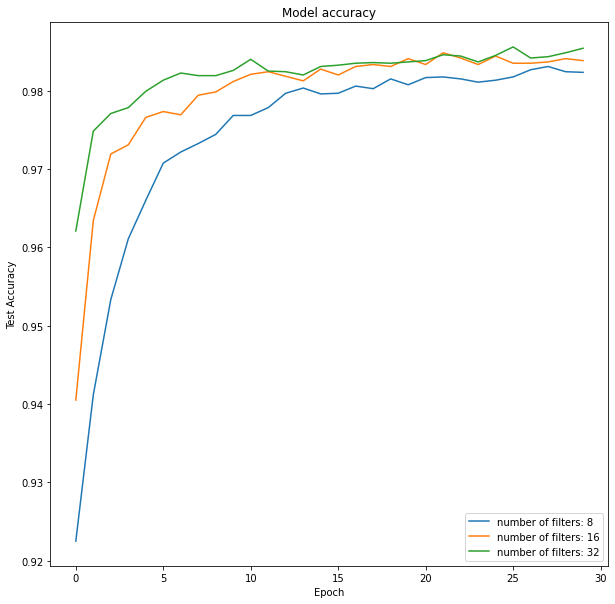

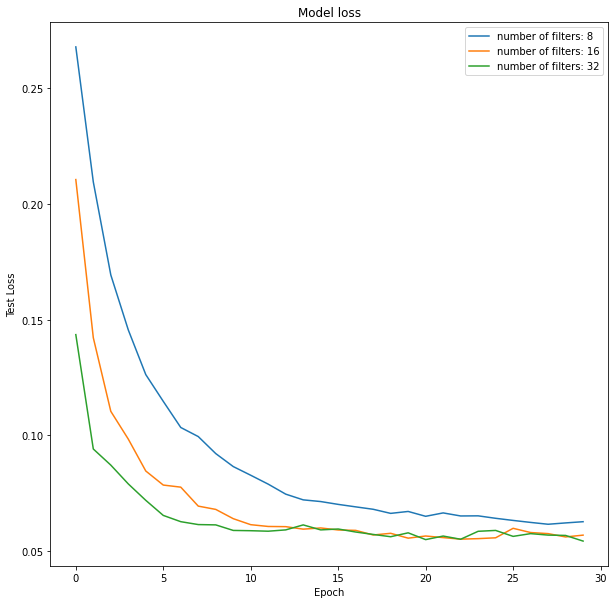

In [ ]:
plot_results(histories, hyperparameter=['number of filters: '+ str(i) for i in filters])

# Experiment with different number of conv2d layers

how many conv layers

In [ ]:
conv2dlayers = [(8,16),(8,16,32),(8,16,32,64)]

models = [gen(conv=n) for n in conv2dlayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

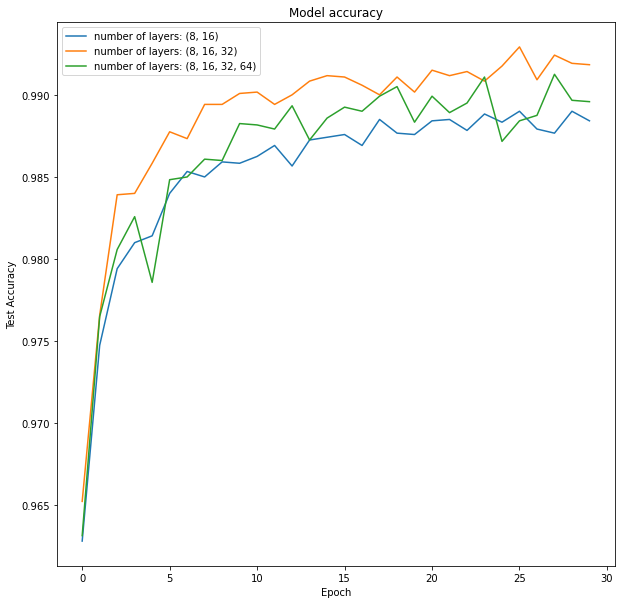

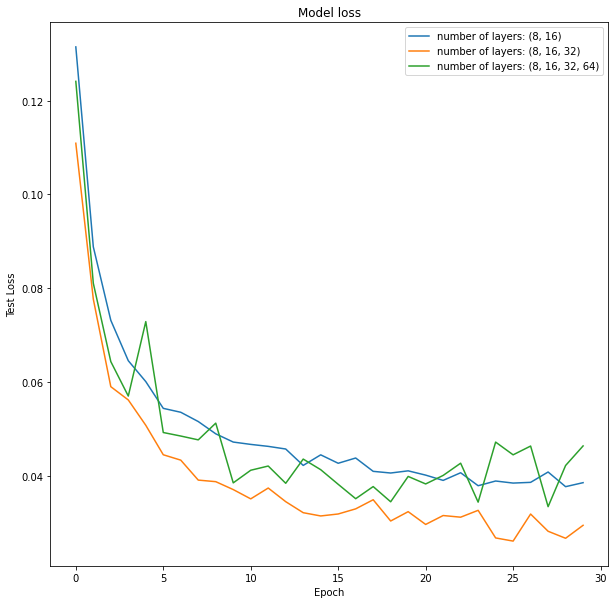

In [ ]:
plot_results(histories, hyperparameter=['number of layers: '+ str(i) for i in conv2dlayers])

# Experiment with different number of filters

it looks like 3 layers work the best

how about increase the number of filters in each layer

In [ ]:
conv2dlayers = [(8,16,32),(16,32,64),(32,64,128),(64,128,256)]

models = [gen(conv=n) for n in conv2dlayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

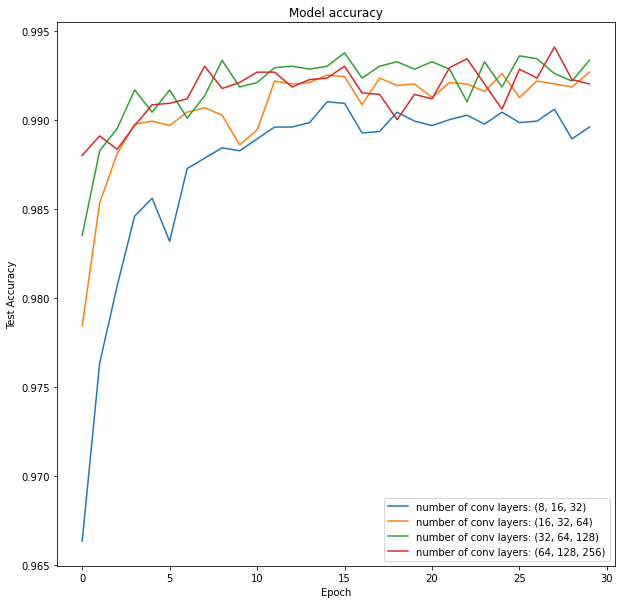

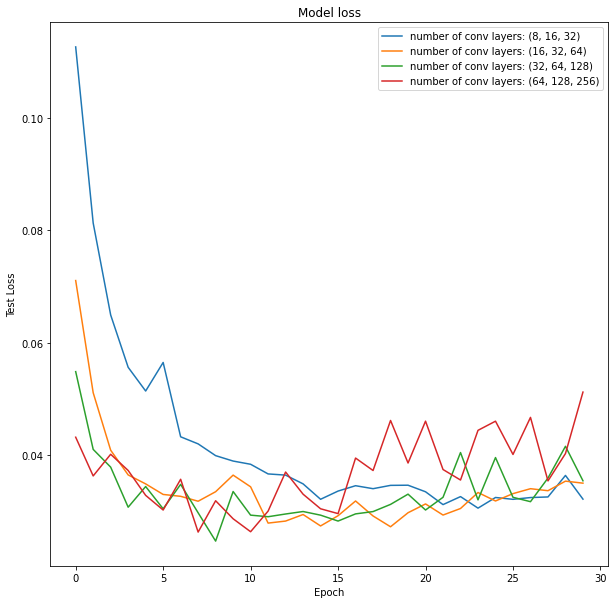

In [ ]:
plot_results(histories, hyperparameter=['number of conv layers: '+ str(i) for i in conv2dlayers])

# Experiment with different number of dense layers

fix (32,64,128)
change dense layers

In [ ]:
denselayers = [(32,),(32,32),(32,32,32)]

models = [gen(conv=(32,64,128),dense=n) for n in denselayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

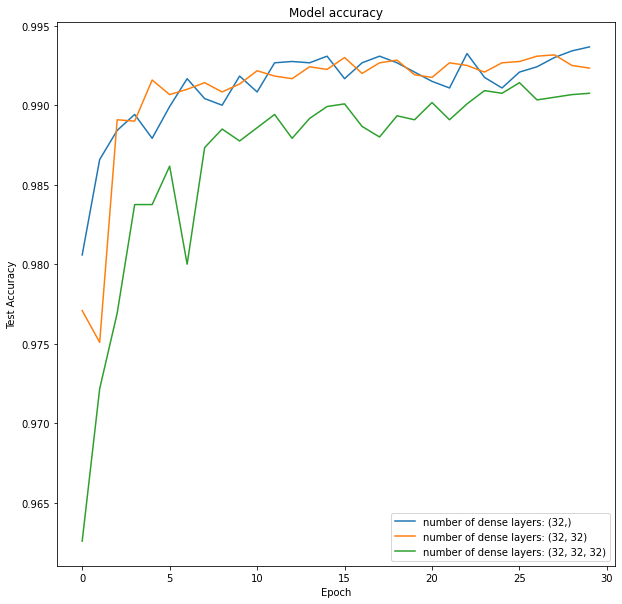

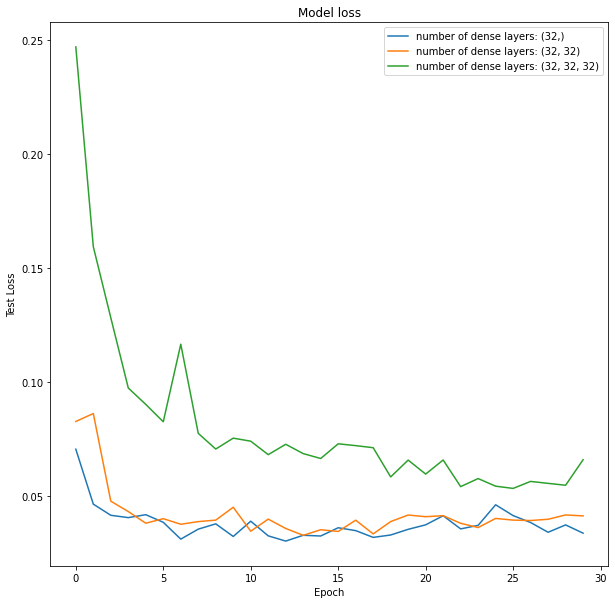

In [ ]:
plot_results(histories, hyperparameter=['number of dense layers: '+ str(i) for i in denselayers])

# Size of dense layer

more dense layers doesnt improve the performace

how about the size of denselayer

In [ ]:
denselayers = [(32,),(64,),(128,),(256,)]

models = [gen(conv=(32,64,128),dense=n) for n in denselayers]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

histories = train(models)

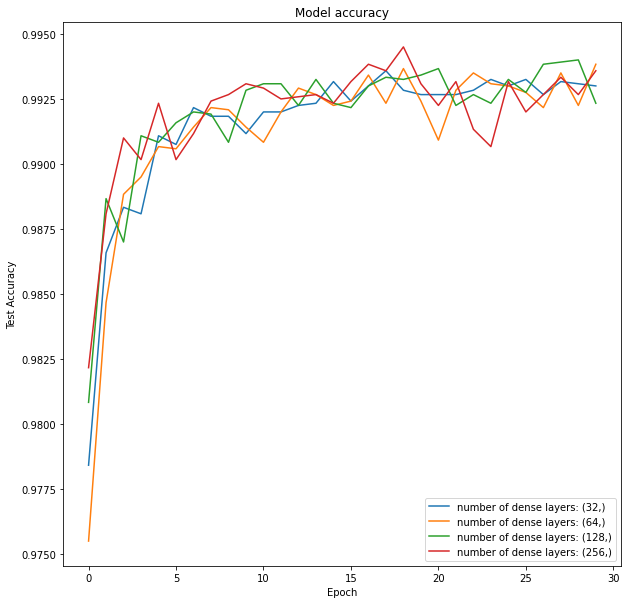

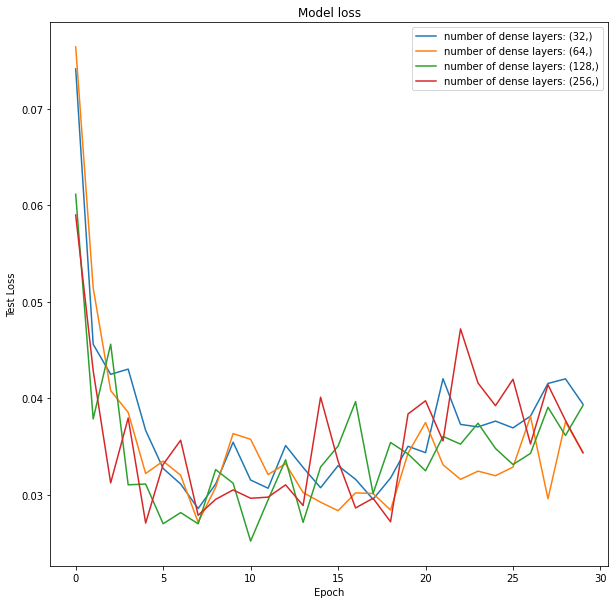

In [ ]:
plot_results(histories, hyperparameter=['number of dense layers: '+ str(i) for i in denselayers])

# Activation fucntions

fix dense layer size 256

we experiment the effect of different activation functions

In [ ]:
activations = ['ReLU','leakyReLU','ELU']
act_functions = [keras.layers.ReLU,
                 keras.layers.LeakyReLU,
                 keras.layers.ELU]

models = [gen(conv=(32,64,128),dense=(256,),activation=n) for n in act_functions]
for model in models:
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
histories = train(models)

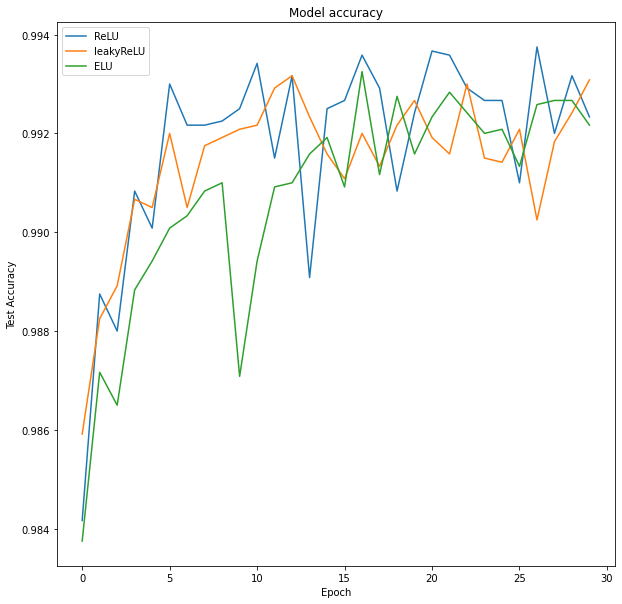

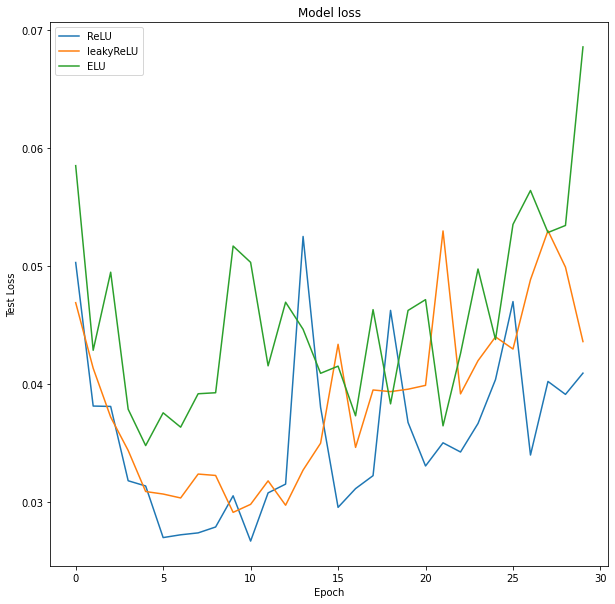

In [ ]:
plot_results(histories, hyperparameter=activations)

#Optimizer


In [1]:
optimizers = [
    'Adadelta',
    'Adagrad',
    'Adam',
    'Adamax',
    'Nadam',
    'RMSprop',
    'SGD'
]
for optimizer in optimizers:
    model = gen(conv=(32,64,128),dense=(256,),activation=keras.layers.ReLU)
    print(optimizer)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.2, validation_data=(x_test,y_test))
    plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Test Accuracy')
plt.xlabel('epoch')
plt.legend(['Adadelta', 'Adagrad', 'Adam', 'Adamax','Nadam','RMSprop','SGD'], loc='upper left' )

NameError: ignored

# Now putting everything together

In [ ]:
model = gen(conv=(32,64,128),dense=(256,))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
re_lu_74 (ReLU)              (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
re_lu_75 (ReLU)              (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 128)       

In [ ]:
epochs = 50
batch_size = 64

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, validation_data=(x_test,y_test))

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.031733956187963486
Test accuracy: 0.9941999912261963
